In [2]:
import pandas as pd
import numpy as np

# Set seed for reproducibility
np.random.seed(42)

# Generate synthetic data
n_customers = 200
customer_id = np.arange(1, n_customers+1)
age = np.random.randint(18, 70, size=n_customers)
annual_income = np.random.randint(15, 140, size=n_customers)  # in k$
spending_score = np.random.randint(1, 101, size=n_customers)  # 1-100 scale

# Create DataFrame
df = pd.DataFrame({
    'CustomerID': customer_id,
    'Age': age,
    'Annual Income (k$)': annual_income,
    'Spending Score (1-100)': spending_score
})

df.head()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
0,1,56,84,61
1,2,69,86,48
2,3,46,41,19
3,4,32,23,4
4,5,60,76,35


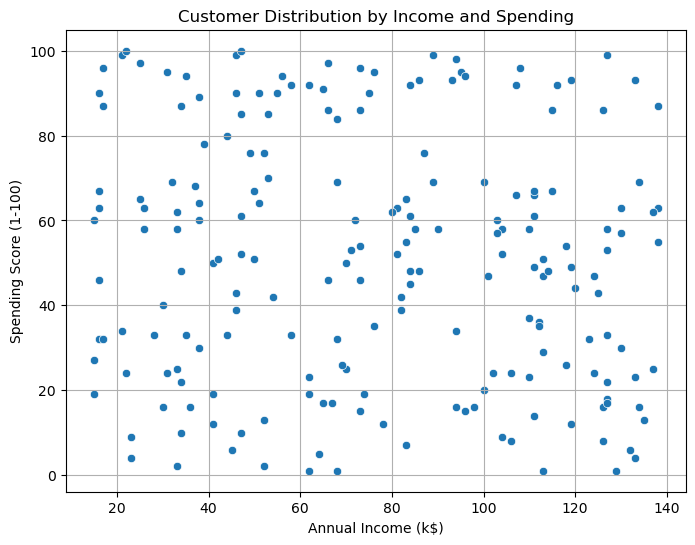

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)')
plt.title("Customer Distribution by Income and Spending")
plt.grid(True)
plt.show()

In [4]:
from sklearn.cluster import KMeans

# Select only two columns for simplicity
X = df[['Annual Income (k$)', 'Spending Score (1-100)']]

# Apply KMeans with 5 clusters
kmeans = KMeans(n_clusters=5, random_state=42)
df['Cluster'] = kmeans.fit_predict(X)

df.head()

C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(


,CustomerID,Age,Annual Income (k$),Spending Score (1-100),Cluster
0,1,56,84,61,4
1,2,69,86,48,4
2,3,46,41,19,1
3,4,32,23,4,1
4,5,60,76,35,1


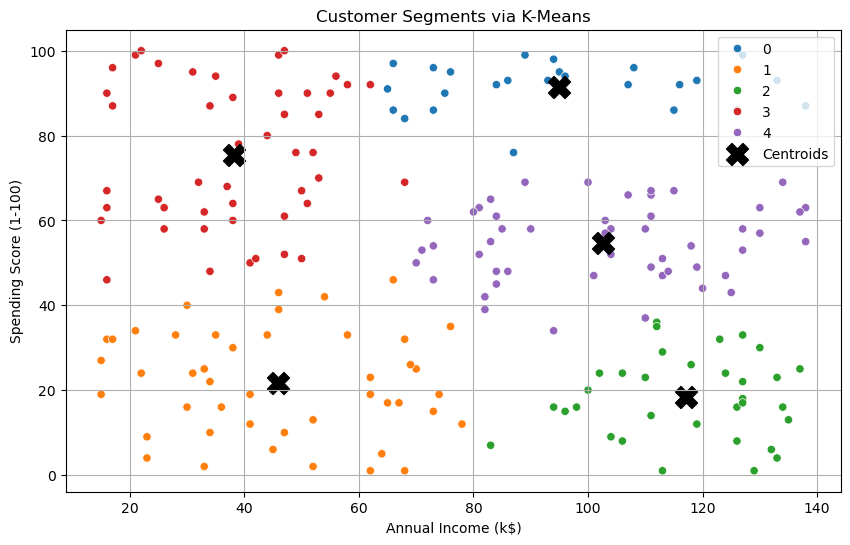

In [5]:
plt.figure(figsize=(10,6))
sns.scatterplot(data=df, x='Annual Income (k$)', y='Spending Score (1-100)', hue='Cluster', palette='tab10')
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=250, c='black', marker='X', label='Centroids')
plt.legend()
plt.title("Customer Segments via K-Means")
plt.grid(True)
plt.show()

C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known to have a memory leak on Windows with MKL, when there are less chunks than available threads. You can avoid it by setting the environment variable OMP_NUM_THREADS=1.
  warnings.warn(
C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\cluster\_kmeans.py:1429: UserWarning: KMeans is known

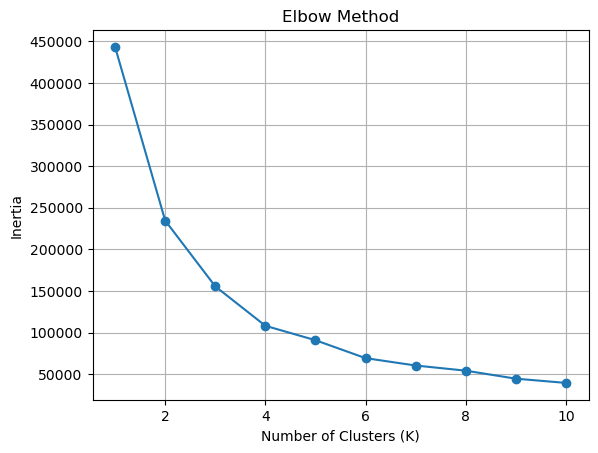

In [6]:
inertia = []
K_range = range(1, 11)

for k in K_range:
    km = KMeans(n_clusters=k, random_state=42)
    km.fit(X)
    inertia.append(km.inertia_)

plt.plot(K_range, inertia, 'o-')
plt.xlabel("Number of Clusters (K)")
plt.ylabel("Inertia")
plt.title("Elbow Method")
plt.grid(True)
plt.show()

In [7]:
# Example: Customer with 60k annual income, spending score 80
new_customer = [[60, 80]]
predicted_cluster = kmeans.predict(new_customer)
print("Predicted Cluster:", predicted_cluster[0])

Predicted Cluster: 3


C:\Users\saket.khopkar\anaconda3\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but KMeans was fitted with feature names
  warnings.warn(
